In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
# randomly generated data set
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

In [97]:
def sigmoid (z):
    return 1.0/(1+np.exp(-z))

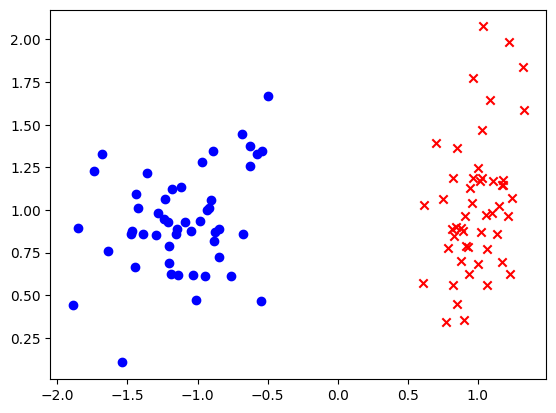

In [98]:
pos = np.where(y==1)
neg = np.where(y==0)

plt.scatter(X[pos,0], X[pos,1], marker='o', c='b')
plt.scatter(X[neg,0], X[neg,1], marker='x', c='r')

In [99]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat))-(1-y)*np.log(1-y_hat))
    return loss

In [100]:
def gradients(X, y, y_hat):
    # X-->Input
    #y --> target
    #y_hat --> predicted
    # w --> weights
    # b --> bias

    #m --> number of training examples
    m = X.shape[0]

    dw = (1/m)*np.dot(X.T, (y_hat - y))
    db = (1/m)*np.sum(y_hat - y)

    return dw, db

In [101]:
def plot_decision_boundary(X, w, b):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c

    # plotting
    fig = plt.figure(figsize=(10, 8))
    # plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "g^")
    # plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.scatter(X[pos,0], X[pos,1], marker='o', c='b')
    plt.scatter(X[neg,0], X[neg,1], marker='x', c='r')
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Decision Boundary")

    plt.plot(x1, x2, 'y-')

In [102]:
def normalize(X):
    m, n = X.shape

    for i in range(n):
        X = (X - X.mean(axis = 0))/X.std(axis = 0)
    
    return X

In [103]:
def train(X, y, bs, epochs, lr):
    # X --> Input
    # y --> target
    # bs --> batch size
    # epochs --> number of iterations
    # lr --> learning rate

    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0

    y = y.reshape(m, 1)
    X = normalize(X)

    losses = []

    for epoch in range(epochs):
        for i in range ((m - 1)//bs + 1):

            # defining batches
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i : end_i]
            yb = y[start_i : end_i]

            y_hat = sigmoid(np.dot(xb, w) + b)

            dw, db = gradients(xb, yb, y_hat)

            w -= lr*dw
            b -= lr*db
        
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)

    return w, b, losses

In [104]:
def predict(X):
    x = normalize(X)

    preds = sigmoid(np.dot(X, w) + b)

    pred_class = []

    pred_class = [1 if i > 0.5 else 0 for i in preds]

    return np.array(pred_class)

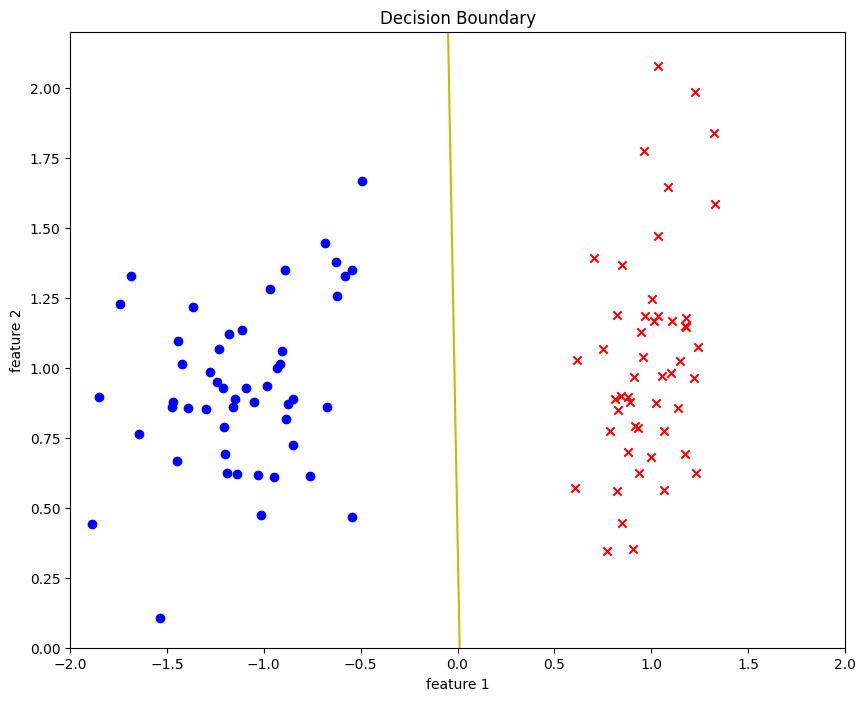

In [105]:
w, b, l = train(X, y, bs = 100, epochs = 1000, lr = 0.01)

plot_decision_boundary(X, w, b)

In [106]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.24)

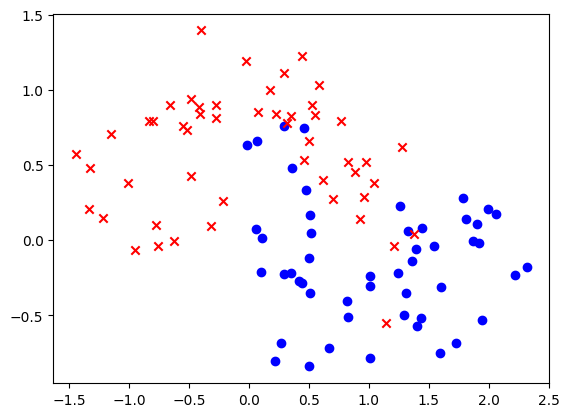

In [107]:
pos = np.where(y==1)
neg = np.where(y==0)

plt.scatter(X[pos,0], X[pos,1], marker='o', c='b')
plt.scatter(X[neg,0], X[neg,1], marker='x', c='r')

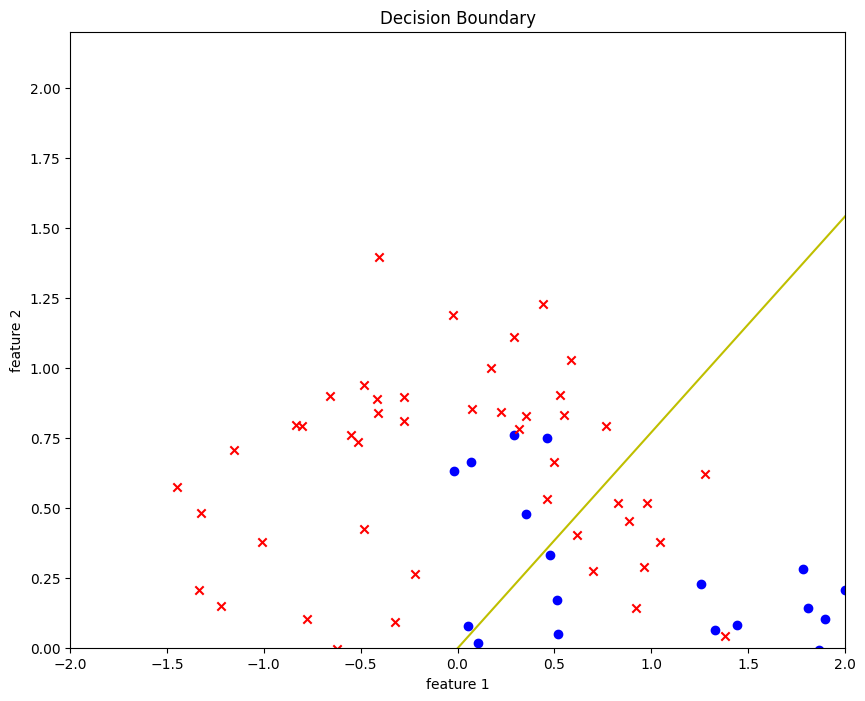

In [108]:
w, b, l = train(X, y, bs = 100, epochs = 1000, lr = 0.01)

plot_decision_boundary(X, w, b)